In [1]:
from pyrosm import OSM
from pyrosm import get_data

osm = OSM("../data/lisbon-latest.osm.pbf")

# Read all boundaries using the default settings
boundaries = osm.get_boundaries()
#boundaries.plot(facecolor="none", edgecolor="blue")

In [2]:
boundaries.border_type.value_counts()

border_type
freguesia    157
município     26
distrito       4
Name: count, dtype: int64

In [3]:
boundaries[boundaries["border_type"] == "distrito"].to_crs(epsg=3035).area.sum() / (10**6)

np.float64(3379.0259025015803)

<Axes: >

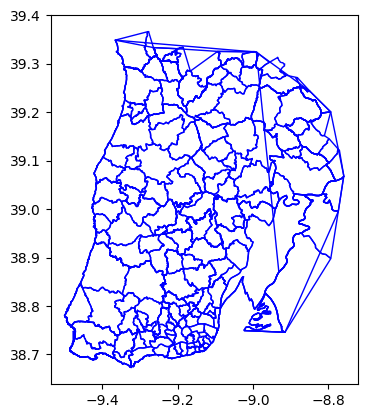

In [4]:
boundaries.plot(facecolor="none", edgecolor="blue")

In [5]:
boundaries.border_type.value_counts()

border_type
freguesia    157
município     26
distrito       4
Name: count, dtype: int64

In [6]:
boundaries[boundaries.border_type == "município"].sort_values(by="name")

,name,website,admin_level,boundary,border_type,start_date,id,timestamp,version,changeset,geometry,tags,osm_type
47,Alcochete,https://www.cm-alcochete.pt/,7,administrative,município,1515,2447054634,1730475222,13,0,"POLYGON ((-9.02432 38.74929, -9.0242 38.74943,...","{""nat_ref"":""ACH"",""official_name"":""Munic\u00EDp...",relation
34,Alenquer,https://www.cm-alenquer.pt/,7,administrative,município,1212,2360639767,1698504733,9,0,"POLYGON ((-9.16389 39.10631, -9.16323 39.10648...","{""nat_ref"":""ALQ"",""official_name"":""Munic\u00EDp...",relation
41,Amadora,https://www.cm-amadora.pt/,7,administrative,município,1979,2403846494,1733077866,16,0,"POLYGON ((-9.26426 38.74103, -9.26506 38.74042...","{""nat_ref"":""AMD"",""official_name"":""Munic\u00EDp...",relation
36,Arruda dos Vinhos,https://www.cm-arruda.pt/,7,administrative,município,1172,2371441366,1698452579,11,0,"POLYGON ((-9.17321 38.98281, -9.17316 38.98282...","{""nat_ref"":""ARV"",""official_name"":""Munic\u00EDp...",relation
35,Azambuja,https://www.cm-azambuja.pt/,7,administrative,município,1200,2366040524,1698289189,8,0,"POLYGON ((-9.00475 39.18639, -9.00468 39.18654...","{""nat_ref"":""AZB"",""official_name"":""Munic\u00EDp...",relation
29,Benavente,https://www.cm-benavente.pt/,7,administrative,município,1200,2333636728,1730475222,10,0,"POLYGON ((-8.77384 38.99483, -8.77713 38.99582...","{""nat_ref"":""BNV"",""official_name"":""Munic\u00EDp...",relation
28,Bombarral,https://www.cm-bombarral.pt/,7,administrative,município,1914,2328236162,1698289179,11,0,"POLYGON ((-9.09404 39.32515, -9.09372 39.3248,...","{""nat_ref"":""BBR"",""official_name"":""Munic\u00EDp...",relation
9,Cadaval,https://www.cm-cadaval.pt/CustomPages/ShowPage...,7,administrative,município,1371,515094978,1698289182,25,0,"POLYGON ((-9.17844 39.19784, -9.17806 39.19735...","{""nat_ref"":""CDV"",""official_name"":""Munic\u00EDp...",relation
24,Caldas da Rainha,http://www.cm-caldas-rainha.pt/,7,administrative,município,1511,1282808197,1678019217,30,0,"POLYGON ((-8.99123 39.32367, -8.99091 39.32345...","{""nat_ref"":""CLD"",""official_name"":""Munic\u00EDp...",relation
30,Cartaxo,https://www.cm-cartaxo.pt/,7,administrative,município,1815,2339037295,1678019220,11,0,"POLYGON ((-8.79396 39.20032, -8.80141 39.19963...","{""nat_ref"":""CTX"",""official_name"":""Munic\u00EDp...",relation


In [7]:
valid_districts = [
    2360639767,
    2403846494,
    2371441366,
    2366040524,
    515094978,
    2409247383,
    2414648273,
    2376842209,
    546980796,
    2382243053,
    2420049164,
    2425450056,
    2430850949,
    2387643898,
    454253144,
    2393044744
]

len(valid_districts)

16

In [8]:
lisbon_districts = boundaries[boundaries["id"].isin(valid_districts)]

In [9]:
import pandas as pd
lisbon_parishes = []

for _, district in lisbon_districts.iterrows():
    lisbon_parishes.append(
        boundaries[(boundaries["border_type"] == "freguesia") & (boundaries["geometry"].within(district.geometry))]
    )

lisbon_parishes = pd.concat(lisbon_parishes)

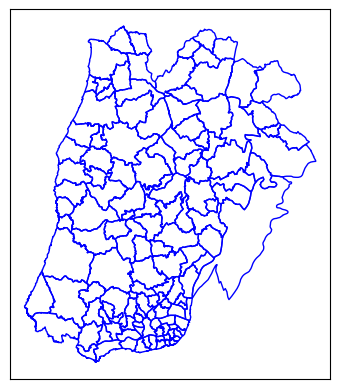

In [10]:
import matplotlib.pyplot as plt

lisbon_parishes.plot(facecolor="none", edgecolor="blue")
plt.yticks([])
plt.xticks([])
plt.savefig("parishes.png")

In [11]:
pois = osm.get_pois()

In [12]:
pois.head()

,changeset,id,visible,timestamp,lon,version,tags,lat,addr:city,addr:country,...,bbq,charging_station,landuse,police,dry_cleaning,golf,supermarket,water,zoo,theatre
0,0.0,108399210,False,1581621040,-9.399506,6,None,39.048550,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,129994343,False,1613659957,-9.414704,6,"{""brand"":""GALP"",""brand:wikidata"":""Q1492739"",""b...",38.958469,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,145997451,False,1602877995,-9.191987,9,None,38.783779,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,196052478,False,1487763388,-9.447779,3,None,38.696140,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,196067506,False,1697929762,-9.499022,11,"{""name:en"":""Cape Roca"",""name:ja"":""\u30ED\u30AB...",38.780506,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
pois.columns

Index(['changeset', 'id', 'visible', 'timestamp', 'lon', 'version', 'tags',
       'lat', 'addr:city', 'addr:country', 'addr:full', 'addr:housenumber',
       'addr:housename', 'addr:postcode', 'addr:place', 'addr:street', 'email',
       'name', 'opening_hours', 'operator', 'phone', 'ref', 'url', 'website',
       'amenity', 'atm', 'bicycle_parking', 'bicycle_rental', 'bar',
       'building', 'building:levels', 'cafe', 'drinking_water', 'fast_food',
       'fountain', 'fuel', 'internet_access', 'office', 'parking',
       'restaurant', 'school', 'social_facility', 'source', 'start_date',
       'taxi', 'wikipedia', 'agrarian', 'bicycle', 'books', 'clothes',
       'coffee', 'collector', 'craft', 'fireplace', 'furniture', 'gift',
       'hairdresser', 'lottery', 'medical_supply', 'mobile_phone', 'model',
       'motorcycle', 'music', 'organic', 'religion', 'second_hand', 'shoes',
       'shop', 'ski', 'swimming_pool', 'tobacco', 'trade', 'vacuum_cleaner',
       'attraction', 'caravan

In [14]:
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

In [15]:
pois["poi_type"].value_counts()[:20]

poi_type
parking             16268
restaurant           4256
bench                3020
cafe                 2384
vending_machine      2247
parking_space        1631
recycling            1543
charging_station     1257
school               1183
clothes               945
hairdresser           928
place_of_worship      847
drinking_water        805
bicycle_parking       779
supermarket           734
pharmacy              631
bank                  581
convenience           565
waste_basket          560
parking_entrance      553
Name: count, dtype: int64

In [16]:
filtered_pois = []

for _, parish in lisbon_parishes.iterrows():
    filtered_pois.append(
        pois[pois["geometry"].within(parish.geometry)]
    )
    
filtered_pois = pd.concat(filtered_pois)

In [17]:
filtered_pois.poi_type.value_counts()[:20]

poi_type
parking             15942
restaurant           3988
bench                2956
cafe                 2291
vending_machine      2241
parking_space        1583
recycling            1476
charging_station     1184
school               1113
clothes               914
hairdresser           875
place_of_worship      799
drinking_water        776
bicycle_parking       772
supermarket           699
pharmacy              615
bank                  551
waste_basket          548
convenience           546
parking_entrance      530
Name: count, dtype: int64

In [18]:
len(filtered_pois.poi_type.unique())

382

In [19]:
len(pois)

62044

In [20]:
len(filtered_pois)

59834

In [21]:
filtered_pois.poi_type.value_counts()[:20].sum()

np.int64(40399)

In [22]:
40399/59834

0.6751846776080489

In [23]:
59834/62044

0.9643801173360841

In [26]:
lisbon_parishes.to_file("../data/lisbon_parishes.geojson", driver="GeoJSON")